In [1]:
import pandas as pd
import numpy as np
import os

# LOAD TRAINING DATA

In [2]:
df_data = pd.read_csv('data/train_values.csv')
df_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
df_target = pd.read_csv('data/train_labels.csv')
df_target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
df_target.count()

patient_id               180
heart_disease_present    180
dtype: int64

In [5]:
df_data.count()

patient_id                              180
slope_of_peak_exercise_st_segment       180
thal                                    180
resting_blood_pressure                  180
chest_pain_type                         180
num_major_vessels                       180
fasting_blood_sugar_gt_120_mg_per_dl    180
resting_ekg_results                     180
serum_cholesterol_mg_per_dl             180
oldpeak_eq_st_depression                180
sex                                     180
age                                     180
max_heart_rate_achieved                 180
exercise_induced_angina                 180
dtype: int64

In [6]:
target = df_target[['heart_disease_present']]

In [7]:
target.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [8]:
data_raw = df_data.drop(columns=['patient_id'])
data_raw.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
data_raw_thal_less = data_raw.drop(columns=['thal'])
data_raw_thal_less.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0


# Encode thal

In [10]:
thal_data = data_raw["thal"]
thal_data.head()

0               normal
1               normal
2               normal
3    reversible_defect
4    reversible_defect
Name: thal, dtype: object

In [11]:
thal_encode=pd.get_dummies(thal_data)
thal_encode.head()

,fixed_defect,normal,reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


# Recombine Training Data

In [12]:
data = pd.concat([thal_encode,data_raw_thal_less], axis=1, sort=False)
data.head()

,fixed_defect,normal,reversible_defect,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,1,0,2,110,3,0,0,0,214,1.6,0,54,158,0
2,0,1,0,1,125,4,3,0,2,304,0.0,1,77,162,1
3,0,0,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,0,0,1,3,178,1,0,0,2,270,4.2,1,59,145,0


# LOAD TEST VALUES

In [13]:
df_test_data = pd.read_csv('data/test_values.csv')
df_test_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


# Model Comparison

In [14]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Load Data
x = data
Y = target

In [16]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(x)

In [17]:
x_scaled = X_scaler.transform(x)

In [18]:
# prepare configuration for cross validation test harness
seed = 7

In [19]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_scaled, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

LR: 0.822222 (0.077778)
LDA: 0.833333 (0.055556)
KNN: 0.783333 (0.087665)
RFC: 0.822222 (0.064788)
CART: 0.716667 (0.134830)
NB: 0.822222 (0.088889)
SVM: 0.800000 (0.061864)


/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pas

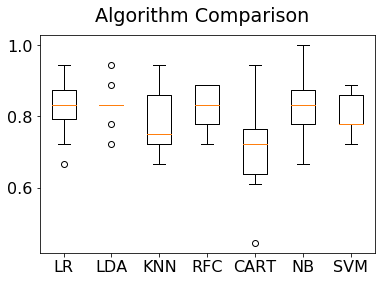

In [21]:
# boxplot algorithm comparison
fig = plt.figure()



plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Logistic Regression Training - Split Training Data with Scaler Transform

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
classifier.fit(X_train_scaled, y_train)

/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.4
Testing Data Score: 0.5777777777777777


In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

# Logistic Regression Training - Whole Training Data (DID NOT COMPLETE - NOT SURE IT MAKES SENSE)

In [41]:
x_scaler_lr = StandardScaler().fit(x)
x_train_scaled_lr = x_scaler_lr.transform(x)

In [43]:
classifier.fit(x_train_scaled_lr,Y)

/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)